# Background Information 

Comparing Assuracy of Decision Tree v/s SVM 



In [ ]:
# Step 1 (Set-Up og all the required packages)

# To plot pretty figure
import matplotlib 
import matplotlib.pyplot as plt 

# Common import 
import numpy as np 
import pandas as pd 
import sklearn.linear_model

In [20]:
#load the data  

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [51]:
#Step 2 Selecting the model and required calculations metrics

#(import classifers and dataset)

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, roc_curve, auc

#Step 3 (train and test split)

#Split the dataset into a training set and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:
#Step 4: training classier 1 
    
#Training a DecisionTreeClassifer on the moons dataset. 

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [61]:
#Use GridsearchCV

#To find the best hyperparameters for a decision tree classifier.

from sklearn.model_selection import GridSearchCV

parameter = {
             'criterion' : ["gini", "entropy"],
             'max_leaf_nodes': list(range(2, 50)), 
             'min_samples_split': [2, 3, 4]
            }

#Use grid search with cross-validation 
#To find the best hyperparameters for a decision tree classifier.
   
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


0.8695

Accuracy of approximately 86% for DecisionTreeClasifer using best hyperparameters 

In [89]:

# Print the best parameters after tuning
print(grid_search_cv.best_params_)

# Print the best estimator after hyper-parameter tuning
print(grid_search_cv.best_estimator_)




{'max_leaf_nodes': 17, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)


In [50]:
#Step 5: Training classifer 2 

#Training a SVC classifier on the monns dataset 

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [80]:
#Use GridsearchCV

#To find the best hyperparameters for a SVM
from sklearn.model_selection import GridSearchCV
  
# defining parameter range, he higher the number, the more verbose 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   1.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=   1.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=   1.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   1.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.802 total time=   1.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.874 total time=   5.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.869 total time=   5.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.868 total time=   4.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.859 total time=   5.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.847 total time=   1.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   1.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.864 total time=   1.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.864 total time=   1.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.856 total time=   1.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.834 total time=   1.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.861 total time=   1.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.868 total time=   1.5s
[CV 4/5] END ....C=1000, gam

It shows, SVC with C=100 and gamma 1 has the highest accurate rate of 87%. However, this is still low. 

In [ ]:
#Step 6 : test predict for both clasifiers 

y_pred_tree = tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [53]:
#Accuracy 
 
from sklearn.metrics import accuracy_score

# Compute accuracy for the decision tree classifier

accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Compute accuracy for the SVM classifier

accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [54]:
from sklearn.metrics import mean_squared_error

# Compute mean squared error for the decision tree classifier
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Compute mean squared error for the SVM classifier
mse_svm = mean_squared_error(y_test, y_pred_svm)


In [55]:
from sklearn.metrics import precision_score

# Compute precision for the decision tree classifier
precision_tree = precision_score(y_test, y_pred_tree)

# Compute precision for the SVM classifier
precision_svm = precision_score(y_test, y_pred_svm)

In [56]:
from sklearn.metrics import recall_score

# Compute recall for the decision tree classifier
recall_tree = recall_score(y_test, y_pred_tree)

# Compute recall for the SVM classifier
recall_svm = recall_score(y_test, y_pred_svm)

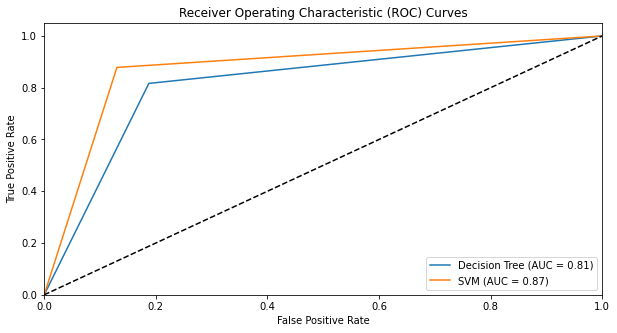

Decision Tree:
Mean Square Error: 0.1855
Accuracy: 0.8145
Precision: 0.8092369477911646
Recall: 0.8166160081053698

SVM:
Mean Square Error: 0.126
Accuracy: 0.874
Precision: 0.8678678678678678
Recall: 0.878419452887538


In [69]:
# Calculate Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
 
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# Display results
print("Decision Tree:")
print("Mean Square Error:", mse_tree)
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("\nSVM:")
print("Mean Square Error:", mse_svm)
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)